# Exploração e análise de dados de aluguel de apartamentos em SP

Intuito da análise é prever os preços dos imóveis de SP usando modelos de machine learning 

## Exploração de dados:
A primeira fase da análise é entender o que tem na nossa matéria prima. Vamos a exploração de dados:

### 1. Importando as bibliotecas e explorando os dados

In [81]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

https://www.kaggle.com/datasets/argonalyst/sao-paulo-real-estate-sale-rent-april-2019

In [13]:
df = pd.read_csv('sao-paulo-properties-april-2019.csv')
df.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


Análisando os dados ja é percebido que são rasas as informações, para uma análise mais precisa seria necessário mais detalhes como: pintura, estado dos móveis, quanto tempo de uso, informações de infraestrutura do condomínio, informações do bairro ao longo do tempo, informações de orientação solar etc.

In [15]:
# separando em 2 DataFrame -> aluguel e venda

df_rent = df[df["Negotiation Type"]=="rent"] 
df_sale = [df["Negotiation Type"]=="sale"]

► Vamos usar apenas a base "rent"

## 2. Mapa de dispersão

In [25]:
# Criar um mapa de dispersão com base nos dados do DataFrame df_rent
fig = px.scatter_mapbox(df_rent, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="District",
                        color="Price",
                        color_continuous_scale=px.colors.sequential.Rainbow,
                        zoom=10)

# Exibir o mapa
iplot(fig)

## 3. Investigando as colunas e etendendo o conjunto de dados

In [28]:
# análisando as informações

df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7228 entries, 0 to 11209
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             7228 non-null   int64  
 1   Condo             7228 non-null   int64  
 2   Size              7228 non-null   int64  
 3   Rooms             7228 non-null   int64  
 4   Toilets           7228 non-null   int64  
 5   Suites            7228 non-null   int64  
 6   Parking           7228 non-null   int64  
 7   Elevator          7228 non-null   int64  
 8   Furnished         7228 non-null   int64  
 9   Swimming Pool     7228 non-null   int64  
 10  New               7228 non-null   int64  
 11  District          7228 non-null   object 
 12  Negotiation Type  7228 non-null   object 
 13  Property Type     7228 non-null   object 
 14  Latitude          7228 non-null   float64
 15  Longitude         7228 non-null   float64
dtypes: float64(2), int64(11), object(3)
memor

In [29]:
# análisando a descrição

df_rent.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000
mean,3077.669065,825.194798,89.486165,2.304234,2.105562,1.024488,1.452269,0.299806,0.172939,0.487963,0.000830,-22.032278,-43.500873
std,3522.830284,835.621937,63.976416,0.829108,0.998162,0.884241,0.889535,0.458205,0.378220,0.499890,0.028802,5.962534,11.675070
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.749039,-58.364352
25%,1350.000000,395.750000,52.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.598066,-46.689788
50%,2000.000000,595.000000,67.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.555869,-46.644793
75%,3300.000000,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.522756,-46.585110
max,50000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


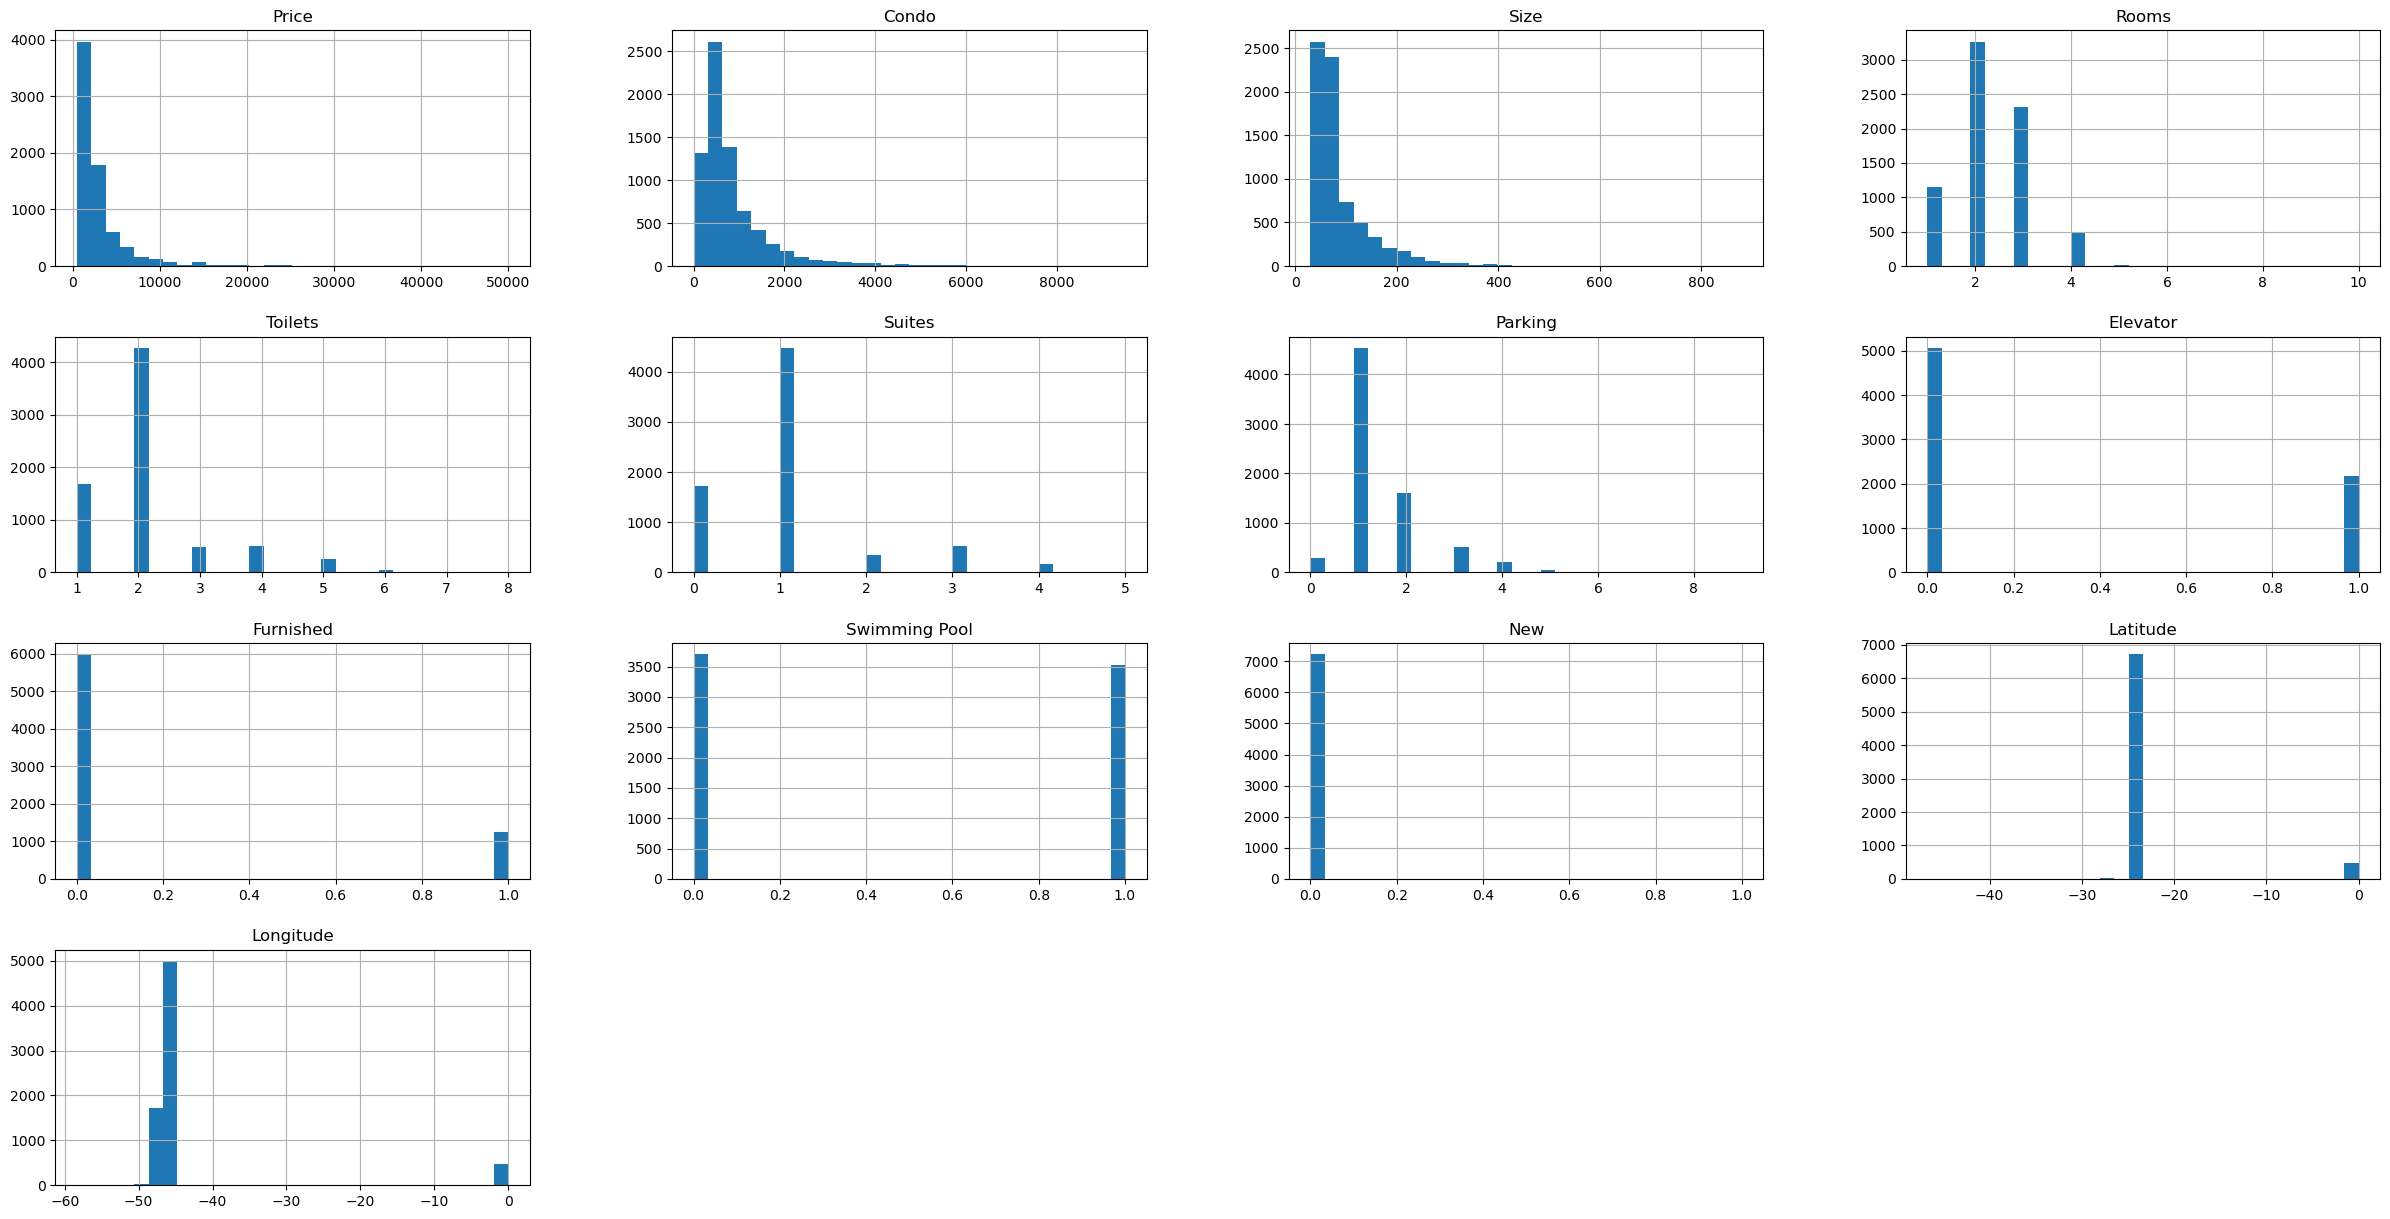

In [31]:
# análisando os histogramas

df_rent.hist(bins=30, figsize=(30,15));

► Análisando os histogramas separadamente dá pra notar que a grande maioria dos apartamentos tem o valor de aluguel 1k, condomínio no valor de R$ 300,00, tamanho de 30 a 60m², maioria dos apartamentos tem 2 quartos, essas são apenas algumas das análises.

► OBS: Foi notado que nenhum apartamento é novo e isso irá implicar diretamente na análise do modelo posteriomente, então o certo a se fazer é remover essa coluna para que não interfira no aprendizado do modelo

► Outro ponto é que o histograma só cria gráficos com valores, então 3 gráficos não foram gerados:  

► 11  District          7228 non-null   object 
► 12  Negotiation Type  7228 non-null   object 
► 13  Property Type     7228 non-null   object 

In [34]:
# análisando se tem casa pra alugar 
df_rent['Property Type'].value_counts()

apartment    7228
Name: Property Type, dtype: int64

► Visto que a váriavel "Property Type" não tem nenhum valor, então não é útil para o nosso modelo, podendo assim ser retirada 

In [36]:
# análisando os bairros 
df_rent['District'].value_counts()

Mooca/São Paulo              178
Moema/São Paulo              163
Vila Mariana/São Paulo       161
Morumbi/São Paulo            159
Pinheiros/São Paulo          153
                            ... 
Lajeado/São Paulo              8
Guaianazes/São Paulo           6
Parque do Carmo/São Paulo      6
Jardim São Luis/São Paulo      3
Grajaú/São Paulo               2
Name: District, Length: 94, dtype: int64

► É notado que os 3 bairros mais densos são: Mooca/São Paulo, Moema/São Paulo e Vila Mariana/São Paulo

## 3. Matriz de correlação

In [38]:
df_rent.corr()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
Price,1.000000,0.700361,0.731795,0.390951,0.583488,0.588329,0.640743,0.031860,0.171859,0.206884,-0.008477,-0.036935,-0.038362
Condo,0.700361,1.000000,0.812374,0.494153,0.596520,0.597069,0.703888,0.020271,0.075928,0.198613,-0.011678,-0.045458,-0.048381
Size,0.731795,0.812374,1.000000,0.673232,0.694294,0.701954,0.752954,0.006993,0.005886,0.148408,-0.017416,-0.043168,-0.046238
Rooms,0.390951,0.494153,0.673232,1.000000,0.557247,0.545859,0.592387,0.000993,-0.104705,0.151225,-0.022166,-0.050753,-0.052897
Toilets,0.583488,0.596520,0.694294,0.557247,1.000000,0.920932,0.703447,0.143176,0.068190,0.262526,-0.007862,-0.128304,-0.129482
Suites,0.588329,0.597069,0.701954,0.545859,0.920932,1.000000,0.718788,0.106189,0.068014,0.267219,-0.006231,-0.130413,-0.131519
Parking,0.640743,0.703888,0.752954,0.592387,0.703447,0.718788,1.000000,0.027476,0.066077,0.304904,0.001547,-0.054828,-0.057929
Elevator,0.031860,0.020271,0.006993,0.000993,0.143176,0.106189,0.027476,1.000000,0.095207,0.150773,0.044049,-0.117160,-0.108175
Furnished,0.171859,0.075928,0.005886,-0.104705,0.068190,0.068014,0.066077,0.095207,1.000000,0.185192,0.012224,-0.022449,-0.018386
Swimming Pool,0.206884,0.198613,0.148408,0.151225,0.262526,0.267219,0.304904,0.150773,0.185192,1.000000,0.019915,-0.025033,-0.020293


In [42]:
# Fazendo a correlação com o preço

df_rent.corr()['Price'].sort_values(ascending=False)

Price            1.000000
Size             0.731795
Condo            0.700361
Parking          0.640743
Suites           0.588329
Toilets          0.583488
Rooms            0.390951
Swimming Pool    0.206884
Furnished        0.171859
Elevator         0.031860
New             -0.008477
Latitude        -0.036935
Longitude       -0.038362
Name: Price, dtype: float64

► O tamanho do apartamento é a variavel que mais se correlaciona com o preço

# Preparação de dados para modelos de Machine Learning

#### Retirando algumas colunas que não seram necessárias para o treinamento do modelo

In [43]:
df_cleaned = df_rent.drop(['New', 'Property Type', 'Negotiation Type'], axis=1)
df_cleaned

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,Artur Alvim/São Paulo,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,Brooklin/São Paulo,-23.617682,-46.694963
11206,21000,3000,208,4,4,3,3,1,1,1,Brooklin/São Paulo,-23.606891,-46.695934
11207,3800,710,55,1,1,0,1,0,1,1,Brooklin/São Paulo,0.000000,0.000000
11208,5000,2354,205,3,2,1,2,1,0,0,Brooklin/São Paulo,-23.612287,-46.681482


## 1.1 Tratamento de dados categóricos

In [47]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

# Tratamento da coluna "District" onde é do tipo object 
housing_cat_1hot = cat_encoder.fit_transform(df_cleaned[['District']])
housing_cat_1hot

<7228x94 sparse matrix of type '<class 'numpy.float64'>'
	with 7228 stored elements in Compressed Sparse Row format>

In [48]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

► Dessa forma vai ser criada uma matriz do tipo "sparse" onde vai gerar varias linhas e colunas contendo apenas 0 e 1, onde cada coluna corresponde a um bairro, e cada linha corresponde a um apartamento e quando o apartamento for daquele bairro o valor vai ser 1 

In [49]:
one_hot = pd.get_dummies(df_cleaned['District'])

df = df_cleaned.drop('District', axis = 1)
df = df.join(one_hot)
df

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,930,220,47,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000,148,45,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000,100,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000,200,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1300,410,55,2,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11206,21000,3000,208,4,4,3,3,1,1,1,...,0,0,0,0,0,0,0,0,0,0
11207,3800,710,55,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
11208,5000,2354,205,3,2,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


► 'District' é removida do DataFrame df_cleaned e as colunas resultantes da codificação one-hot são adicionadas ao DataFrame 'df'. Agora temos um novo DataFrame contendo centenas de colunas indicando 0 ou 1 pra os bairros

## 1.2 Treinamento do modelo

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
Y = df['Price']
X = df.loc[:, df.columns != 'Price']

► o 'Y' vai ser só os valores de preço e o 'X' vai ser tudo, menos o preço

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

► 70% dos meus dados seram separados pra o treino e 30% seram teste

## 1.3 LinearRegression

In [60]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

► Modelo pronto

In [62]:
alguns_dados = x_train.iloc[:5]
algumas_label = y_train.iloc[:5]

print('Predições:', lin_reg.predict(alguns_dados))
print('Labels:', algumas_label.values) 

Predições: [6889.33566889 4238.80924299 1358.01516278 2078.0584542  1605.31752398]
Labels: [6700 2800 1800 1600 1000]


► Fazendo alguns teste podemos ver como estar o acerto do modelo, pra o primeiro caso ele informou que era '6889.3' e o correto era '6700', um valor bem próximo, ja no segundo caso foi '4238.8' para '2800', um valor muito distante.

In [65]:
from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train, preds)

lin_rmse = np.sqrt(lin_mse) # Tirando a raiz quadrda
lin_rmse

1955.5431759699334

► na variavel 'preds' -> Para cada apartamento o modelo diz quanto vale um valor e logo abaixo é feito uma comparação de cada valor previsto com o valor real e logo depois é retirada a raiz quadrada.

O modelo está errando 1955.5431759699334 por predição que ele faz

OBS: Lembrando que ainda não foi ultilizado nenhum dado de teste, apenas explorando ao máximo os dados de treino.

## 1.4 DecisionTree Regressor

In [66]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

► Modelo pronto

In [68]:
preds = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, preds)

tree_rmse = np.sqrt(tree_mse) # Tirando a raiz quadrda
tree_rmse

46.218980505033734

► Comparando o modelo LinearRegression com o DecisionTreeRegresso é notado que o DecisionTreeRegresso se adequou melhor aos dados fornecidos 

## 1.5 Cross-validation

### Árvore

In [69]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x_train, y_train, scoring='neg_mean_squared_error', cv= 10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ',scores.mean())
    print('Standard deviation: ', scores.std())
display_scores(tree_rmse_scores)

Scores:  [2029.34688877 2451.37380294 2005.40703487 1791.74823447 2443.4837808
 2270.28207185 3194.47985592 2282.70748123 2435.39121155 2389.92065921]
Mean:  2329.4141021626247
Standard deviation:  357.89671870870154


► Aqui vemos um exemplo claro de OverFitting: é um comportamento indesejável que ocorre quando o modelo fornece previsões precisas para dados de treinamento, mas não para novos dados, Lembrando que o modelo de Regressão linear tinha um erro de 1955 e aqui estamos com um modelo de 2329 de erro

### Linear

In [70]:
scores = cross_val_score(lin_reg, x_train, y_train, scoring='neg_mean_squared_error', cv= 10)
lin_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ',scores.mean())
    print('Standard deviation: ', scores.std())
display_scores(lin_rmse_scores)

Scores:  [1994.79128824 2077.43358315 1807.17182448 1486.17727289 2207.23312758
 1955.79362647 1628.67833106 2423.48217576 2047.2669091  2169.14216096]
Mean:  1979.7170299679499
Standard deviation:  263.83054047262794


► Quando comparamos ele com dados que ele nunca viu ainda sim a média continua melhor que da árvore de decissão, então nesse caso em especifico a regressão linear se torna um modelo melhor para este caso. 

## 1.6 RandomForest Regressors

In [71]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

► Modelo pronto

In [72]:
preds = rf_reg.predict(x_train)
rf_mse = mean_squared_error(y_train, preds)

rf_rmse = np.sqrt(rf_mse) # Tirando a raiz quadrda
rf_rmse

640.203994936765

► Teve um desempenho de 640 reais de erro, que é bem abaixo da regressão linear, mas ja foi visto que o modelo de árvore teve um desempenho melhor nos dados de treino e quando foi pra os dados de teste ele se saiu melhor

##### Agora vamos fazer a comparação deste modelo no cross-validation

In [73]:
scores = cross_val_score(rf_reg, x_train, y_train, scoring='neg_mean_squared_error', cv= 10)
rf_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ',scores.mean())
    print('Standard deviation: ', scores.std())
display_scores(rf_rmse_scores)

Scores:  [1813.63013909 1956.01153892 1731.70023715 1223.67618315 1829.94244062
 1695.20697274 1564.1939018  2032.84415373 2098.43884077 1686.42789007]
Mean:  1763.2072298059743
Standard deviation:  239.0534900551607


► Comparando os 3 modelos ultilizado, esse modelo de RandomForest Regressors foi o mais promissor

# Avaliando e otimizando o modelo

#### Testando combinações diferentes de parametros e escolher a melhor combinação de todas

In [74]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

► Foi passado alguns parametros que desejamos testar para que ele valide os melhores parametros do ponto de vista do cross-validation

In [75]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

► Os melhores parametros que deram melhores resultados foram esses 

In [76]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

## 2.1 Modelo final

In [77]:
final_model = grid_search.best_estimator_
final_model_predictions = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_model_predictions)
print(np.sqrt(final_mse))

1877.899763359711


► Modelo final perfomou errando em média 1877 reais por apartamento

## 2.2 Gráfico Comparativo

In [79]:
fig = go.Figure(data=[go.Scatter(y=y_test.values),
                     go.Scatter(y=final_model_predictions)])

fig.show()

# Conclusão

O modelo final utilizado, o RandomForest Regressor, apresentou o melhor desempenho na previsão do valor dos apartamentos, com um erro médio de aproximadamente 1.877 reais por apartamento. Esse modelo foi selecionado após comparar e analisar outros modelos, como a linear regression e o DecisionTreeRegressor. Embora o DecisionTreeRegressor tenha se ajustado bem aos dados de treinamento, ele apresentou um comportamento de Overfitting, ou seja, não generalizou bem para novos dados. Já a regressão linear teve um desempenho inferior nos dados de treinamento, mas obteve uma média de erro menor ao ser aplicada aos dados de teste.

Portanto, conclui-se que o modelo RandomForest Regressor é mais promissor e oferece melhores previsões para o valor dos apartamentos. No entanto, é importante destacar que ainda há margem para refinamento e aprimoramento do modelo, como a inclusão de novas variáveis relevantes ou a otimização dos parâmetros, a fim de melhorar ainda mais a precisão das previsões.